In [16]:
import pandas as pd

In [17]:
df = pd.read_csv(r"C:\Users\Omkar Waghmare\OneDrive\Desktop\WORK\COGNIFYZ intern\Dataset .csv")

In [18]:
df.sample(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
9154,6508323,The Urban Foundry,1,Pune,"1, Balewadi High Street, Cummins India Office ...","Balewadi High Street, Balewadi","Balewadi High Street, Balewadi, Pune",73.774723,18.569156,"North Indian, Asian",...,Indian Rupees(Rs.),Yes,No,No,No,3,4.5,Dark Green,Excellent,1099
3404,18435822,Mahavrer Chap Express,1,New Delhi,"F-252-A, Sai Chowk, Dilshad Garden, New Delhi",Dilshad Garden,"Dilshad Garden, New Delhi",77.318203,28.680840,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,0
6240,300672,Chaska,1,New Delhi,"G-6, Maya Complex, GU Block, Pitampura, New Delhi",Pitampura,"Pitampura, New Delhi",77.145203,28.714723,"North Indian, South Indian, Chinese, Fast Food",...,Indian Rupees(Rs.),No,Yes,No,No,2,3.2,Orange,Average,161
5265,2932,Rasoi The Food Express,1,New Delhi,"38, DDA Market, Jeevan Anmol Hospital, Mayur V...",Mayur Vihar Phase 1,"Mayur Vihar Phase 1, New Delhi",77.295353,28.606509,"North Indian, Chinese",...,Indian Rupees(Rs.),No,Yes,No,No,2,2.6,Orange,Average,53
7217,18380146,Joshi Eating House,1,New Delhi,"Main Market, Shakarpur, New Delhi",Shakarpur,"Shakarpur, New Delhi",77.280684,28.630046,North Indian,...,Indian Rupees(Rs.),No,No,No,No,1,0.0,White,Not rated,1


In [19]:
df.shape

(9551, 21)

In [20]:
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

# TASK 1 : Predict Restaurant Rating

**Preprocessing data**

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

df.fillna(df.mean(), inplace=True)

categorical_columns = ['City', 'Locality', 'Locality Verbose', 'Cuisines', 'Currency', 'Rating color', 'Rating text']

label_encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

remaining_categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

df = pd.get_dummies(df, columns=remaining_categorical_columns)

X = df.drop(['Aggregate rating'], axis=1) 
y = df['Aggregate rating'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


C:\Temp\ipykernel_6804\519240301.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


Training set shape: (7640, 16385) (7640,)
Testing set shape: (1911, 16385) (1911,)


**Selecting and fitting suitable regression model**

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(X_train, y_train)

y_test_pred_tree = decision_tree_model.predict(X_test)

mse_tree = mean_squared_error(y_test, y_test_pred_tree)

print("Mean Squared Error (Decision Tree Regression):", mse_tree)


Mean Squared Error (Decision Tree Regression): 0.04768184196755625


In [23]:
from sklearn.metrics import r2_score

r2_tree = r2_score(y_test, y_test_pred_tree)

print("R-squared (Decision Tree Regression):", r2_tree)


R-squared (Decision Tree Regression): 0.9790511604802049


**feature affecting restaurant ratings**

In [24]:
feature_importance = decision_tree_model.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_features = 10 
print("Top", top_features, "most important features:")
print(feature_importance_df.head(top_features))


Top 10 most important features:
                 Feature  Importance
13                 Votes    0.898974
11          Rating color    0.086808
12           Rating text    0.002580
0          Restaurant ID    0.002064
5              Longitude    0.001143
6               Latitude    0.001086
7               Cuisines    0.000885
8   Average Cost for two    0.000753
4       Locality Verbose    0.000523
3               Locality    0.000434


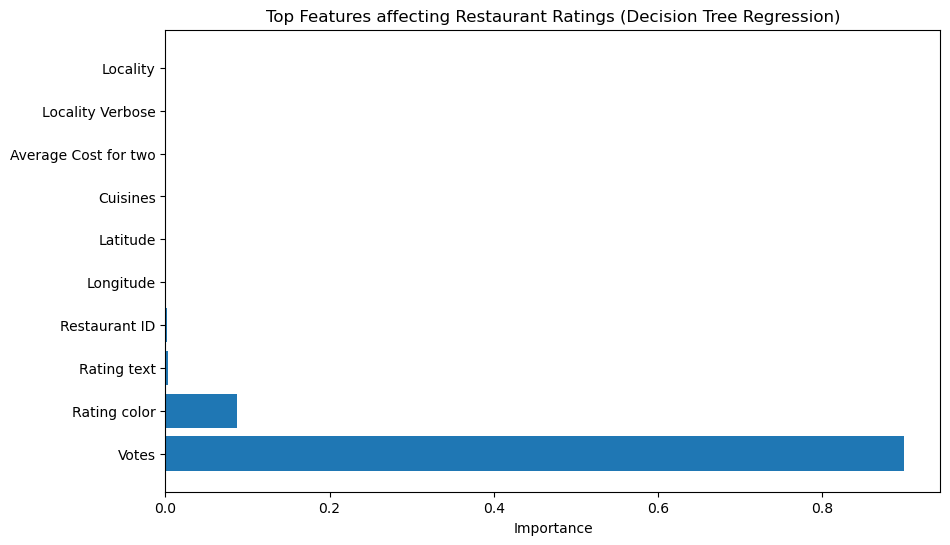

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_features], feature_importance_df['Importance'][:top_features])
plt.xlabel('Importance')
plt.title('Top Features affecting Restaurant Ratings (Decision Tree Regression)')
plt.show()


**interpreting result of predicting restaurant rating**

Sample of Actual vs Predicted Ratings:
      Actual Rating  Predicted Rating
4731            2.1               2.3
1468            4.1               4.1
9037            3.2               3.0
7866            4.4               4.0
5570            3.5               3.5
5613            0.0               0.0
7751            3.2               2.7
1662            0.0               0.0
8592            3.6               3.5
2164            4.0               4.4


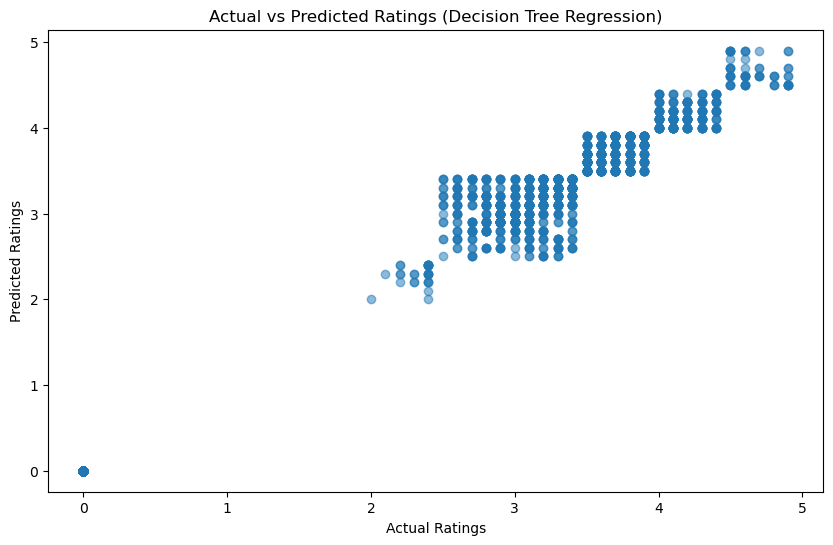

In [26]:
sample_predictions = pd.DataFrame({
    'Actual Rating': y_test,
    'Predicted Rating': y_test_pred_tree
})

print("Sample of Actual vs Predicted Ratings:")
print(sample_predictions.head(10))

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred_tree, alpha=0.5)
plt.xlabel('Actual Ratings')
plt.ylabel('Predicted Ratings')
plt.title('Actual vs Predicted Ratings (Decision Tree Regression)')
plt.show()
